# Correlation Analysis

In [22]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = '1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO'  # Make sure it's a string
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO
To: c:\Users\ncc333\Desktop\DataAndDataAnalysis\Numpy\Class_Task6\data.csv
100%|██████████| 52.0k/52.0k [00:00<00:00, 55.5MB/s]


'data.csv'

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [5]:
from scipy import stats

In [6]:
df

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [ ]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

**Is the beef consumption in Argentina significantly different from that in Bangladesh?**

**H₀: Mean beef consumption (Argentina) = Mean beef consumption (Bangladesh)**

**H₁: Mean beef consumption (Argentina) ≠ Mean beef consumption (Bangladesh)**

In [11]:
# Select Argentina beef consumption
arg_beef = df[(df["country"] == "Argentina") & (df["food_category"]=="beef")]
arg_beef

,country,food_category,consumption,co2_emission
2,Argentina,beef,55.48,1712.0


In [12]:
arg_consumption_mean = arg_beef["consumption"].mean()
arg_consumption_mean

np.float64(55.48)

In [31]:
#Creating samples around the mean
arg_beef_samples = np.random.normal(loc=arg_consumption_mean, scale=5, size=30) #creates a normal distribution of 30 numbers +-5 values around the mean
arg_beef_samples

array([55.34115149, 53.12205623, 57.74499579, 62.45652889, 51.48208183,
       49.72242951, 49.56437853, 66.49547894, 58.84318593, 52.69183114,
       54.38141966, 54.76485409, 51.70712006, 51.88843418, 61.97085708,
       54.60766863, 53.11115219, 62.52039026, 50.29527882, 63.36735982,
       56.71227694, 50.86234969, 52.12559627, 52.11945254, 54.33596089,
       53.02108462, 50.723884  , 51.07848932, 55.94811756, 55.99167139])

In [25]:
bang_beef = df[(df["country"] == "Bangladesh") & (df["food_category"]=="beef")]
bang_beef

,country,food_category,consumption,co2_emission
1421,Bangladesh,beef,1.28,39.5


In [27]:
bang_beef_mean = bang_beef["consumption"].mean()
print(f"Average beef consumption in Bangledesh: {bang_beef_mean}")

Average beef consumption in Bangledesh: 1.28


In [30]:
#Creating samples
bang_beef_samples = np.random.normal(loc=bang_beef_mean, scale=5, size=30)
bang_beef_samples

array([  4.76558691,  -3.96564133,  -2.40891496, -10.92765114,
         3.34700562,   6.62958158,   5.08852781,  -8.53353981,
        -7.25877498,  -2.40058103,  -4.98935406,  -2.06599106,
        -1.60579229,   1.62933191,   1.27663558,  -0.88653129,
         9.79618341,   9.35787561,  -3.20523712,  -2.96375983,
         2.18830716,   7.87044107,   4.52657217,  -2.4992666 ,
        -0.85708576,   6.71926343,  -8.24688307,   6.96861343,
        10.42553747,   5.87684194])

### Performing a two-tailed test

In [ ]:
# Performing a two tailed test
t_statistic, p_val = stats.ttest_ind(bang_beef_samples, arg_beef_samples, alternative='two-sided')

In [38]:
print(f"T Statistic: {t_statistic} \nP-value: {p_val}")

T Statistic: -40.16281604859935 
P-value: 4.994241172768792e-44


In [43]:
critic=stats.t.isf(0.05/2,29)
critic

np.float64(2.0452296421327034)

From the two-tailed test, the absolute value of the t-statitics (40.163) > critical value (2.0452), therefore, the null hypothesis can be rejected and we can conclude that there is a significant difference between the mean beef consumption in Bangladesh and the mean beef consumption in Argentina

### Performing Correlation Analysis

In [41]:
#Checking the linear relationship
corr, p_val = stats.pearsonr(bang_beef_samples, arg_beef_samples)

In [33]:
print(f"Correlation Coefficient: {corr}")

Correlation Coefficient: -0.31595333091203576


Since correlation coefficient (r) is approximately -0.312, this indicates a weak negative linear relationship between the mean beef consumption in Argnetina and mean beef consumption in Argentina

In [34]:
print(f"P-values: {p_val}")

P-values: 0.08896227288587752


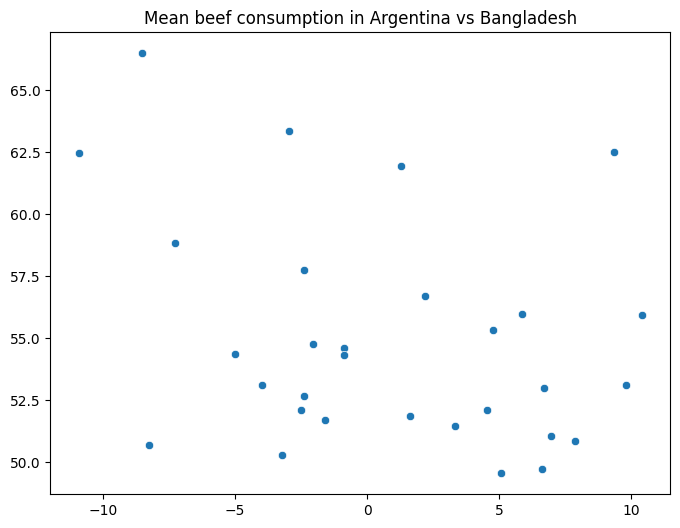

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=bang_beef_samples, y=arg_beef_samples)
plt.title("Mean beef consumption in Argentina vs Bangladesh")
plt.show()